<a href="https://colab.research.google.com/github/Pilgrim-com/Control-Vision-ABU/blob/main/Image_Classfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ติดตั้ง Kaggle และ Dowload **dataset**

In [1]:
!pip install kaggle

In [2]:
import os

# Set the Kaggle API key environment variable
os.environ['KAGGLE_CONFIG_DIR'] = "/content"

# Check if the kaggle.json file exists
if not os.path.exists("/content/kaggle.json"):
    # If it doesn't exist, upload it
    from google.colab import files
    files.upload()

Saving kaggle.json to kaggle.json


In [4]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mv: cannot stat 'kaggle.json': No such file or directory


In [5]:
!kaggle competitions download -c dog-breed-identification

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /content. Or use the environment method.


In [ ]:
!unzip dog-breed-identification.zip -d data

# **Image Classification with fastai and Resnet**

In [ ]:
import os
import os.path as op
import shutil
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

### สร้าง **Data Frame**

In [ ]:
# get all image paths
img_df = pd.DataFrame(glob("datrainta//*.jpg"), columns=["path"])
img_df["id"] = img_df.path.map(lambda x: op.basename(x).replace(".jpg", ""))

# read label data
label_df = pd.read_csv("data/labels.csv")
train_df = img_df.merge(label_df, on="id")

In [ ]:
print("Number of test images = ", len(glob("data/test/*.jpg")))

Number of test images =  10357


In [ ]:
print("Number of train images = ", len(train_df))

Number of train images =  10222


In [ ]:
train_df.head()

,path,id,breed
0,data/train/e93489f9d52d63c373264b27daabf420.jpg,e93489f9d52d63c373264b27daabf420,welsh_springer_spaniel
1,data/train/0b57520c27ed32bc21e35c38cb5dd268.jpg,0b57520c27ed32bc21e35c38cb5dd268,italian_greyhound
2,data/train/3e0a4d4a13e170d406d4e48aee99fec1.jpg,3e0a4d4a13e170d406d4e48aee99fec1,whippet
3,data/train/21b3006afebd75664f31220e2d15e9c4.jpg,21b3006afebd75664f31220e2d15e9c4,english_setter
4,data/train/e620a0807519a406a20dbe50ebeb1b1c.jpg,e620a0807519a406a20dbe50ebeb1b1c,italian_greyhound


### สร้าง **Data Train**

In [ ]:
root_dir = "data/train_breed"
for _, r in train_df.iterrows():
    if not op.exists(f"{root_dir}/{r.breed}"):
        os.makedirs(f"{root_dir}/{r.breed}")
    shutil.copy(r.path, f"{root_dir}/{r.breed}/{r.id}.jpg")

### **Import fastbook** เพื่อเรียกใช้ **fastAI**

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.6/536.6 kB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.3/38.3 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 88.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ibis-framework 7.1.0 requires pyarrow<15,>=2, but you have pyarrow 15.0.0 which is incompatible.
Mounted at /content/gdrive


In [ ]:
from fastbook import *

### สร้าง **DataBlock**

In [ ]:
fields = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    splitter=RandomSplitter(valid_pct=0.2, seed=42), # GrandparentSplitter(valid_name='validation')
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms()
)

In [ ]:
get_image_files("data/test/")

(#10357) [Path('data/test/a09210b024674693bd8349c3e29dfcb4.jpg'),Path('data/test/05f560d4d947f07dcda5199191579122.jpg'),Path('data/test/b2fbbb659764d792b523f17cbbd563a1.jpg'),Path('data/test/38fe82e9b160a8ea05467b989acba467.jpg'),Path('data/test/185413ab6114593edb45d02dc64b4334.jpg'),Path('data/test/8db94c3efe16b1d584ca43c4c8dea3b3.jpg'),Path('data/test/5b20745c9fe0e11e8c5037fc56542f34.jpg'),Path('data/test/622bb55824b5865edbaf07eb7bb1e0a5.jpg'),Path('data/test/8b8edc4c341b44e3a7e9e6d6a1d60cf6.jpg'),Path('data/test/17b8437db4c5a5b2554e68e6be1cf258.jpg')...]

In [ ]:
parent_label("data/test/000621fb3cbb32d8935728e48679680e.jpg")

'test'

In [ ]:
dls = fields.dataloaders("data/train_breed/")

In [ ]:
len(dls.vocab)

In [ ]:
dls.vocab

NameError: name 'dls' is not defined

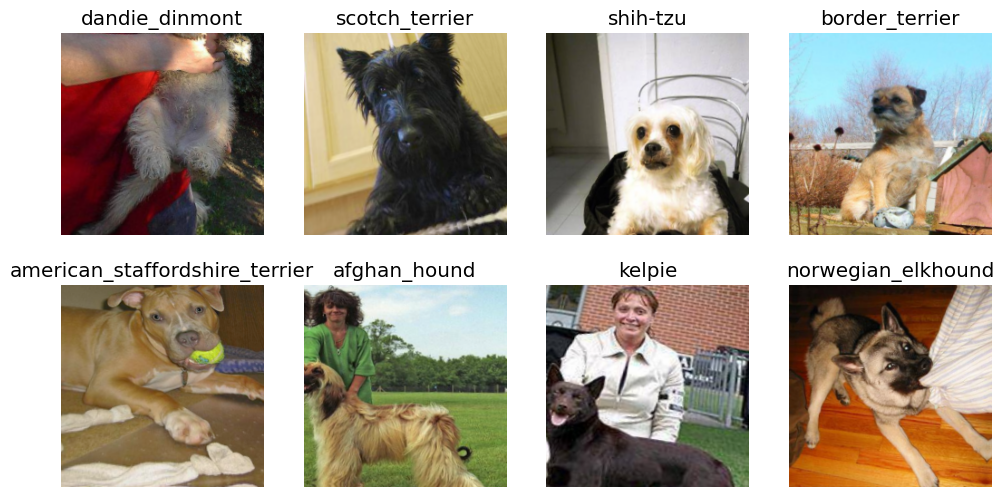

In [ ]:
dls.train.show_batch(max_n=8, nrows=2)

In [ ]:
learner = cnn_learner(dls, resnet34, metrics=[error_rate, accuracy])

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 128MB/s]


SuggestedLRs(valley=1.2022644114040304e-05)

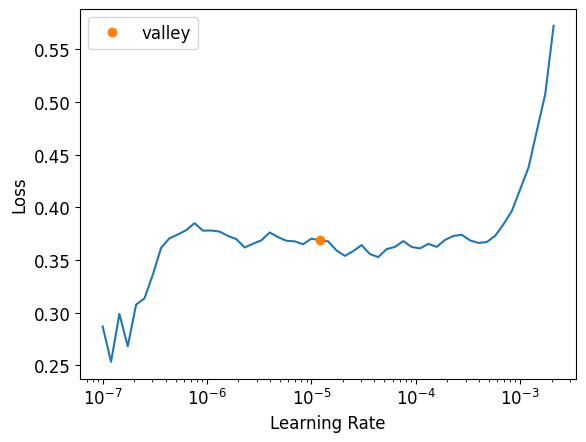

In [ ]:
learner.lr_find() # หา learning rate ที่เหมาะสม

In [ ]:
learner.fine_tune(epochs=3, freeze_epochs=1, base_lr=0.000832)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.502250,0.630587,0.197162,0.802838,00:52


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.473852,0.677613,0.201076,0.798924,01:00
1,0.479457,0.654202,0.201076,0.798924,01:00
2,0.367669,0.629435,0.188356,0.811644,00:58


In [ ]:
interp = ClassificationInterpretation.from_learner(learner)
# interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
interp.most_confused(min_val=5)

[('lhasa', 'shih-tzu', 10),
 ('miniature_poodle', 'toy_poodle', 6),
 ('staffordshire_bullterrier', 'american_staffordshire_terrier', 6),
 ('entlebucher', 'greater_swiss_mountain_dog', 5),
 ('eskimo_dog', 'malamute', 5),
 ('kuvasz', 'great_pyrenees', 5),
 ('standard_schnauzer', 'miniature_schnauzer', 5),
 ('toy_poodle', 'miniature_poodle', 5)]

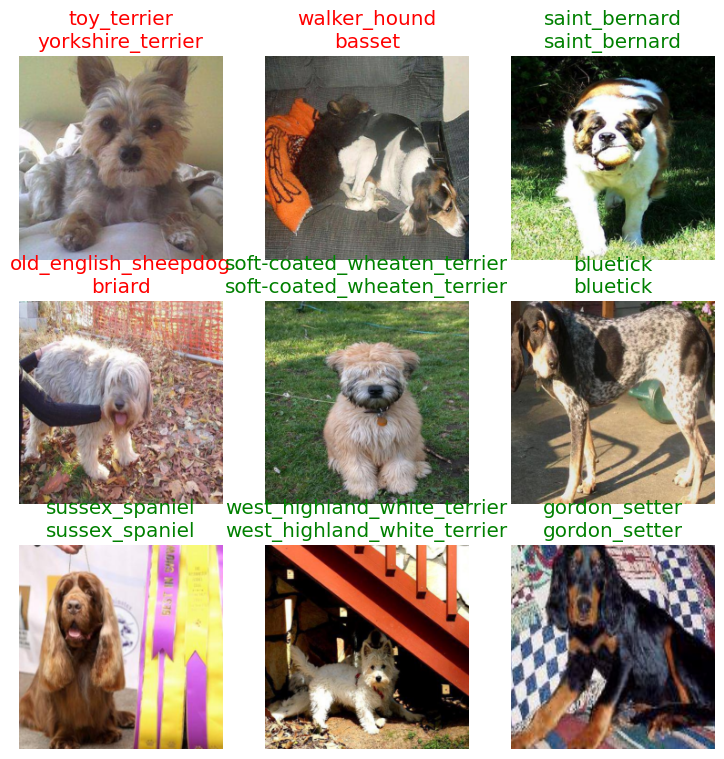

In [ ]:
learner.show_results(shuffle=True)